In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
#2. データを準備する
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                     size=len(x))
    return sin(x) + noise

T = 100
f = toy_problem(T).astype(np.float32)
length_of_sequences = len(f)

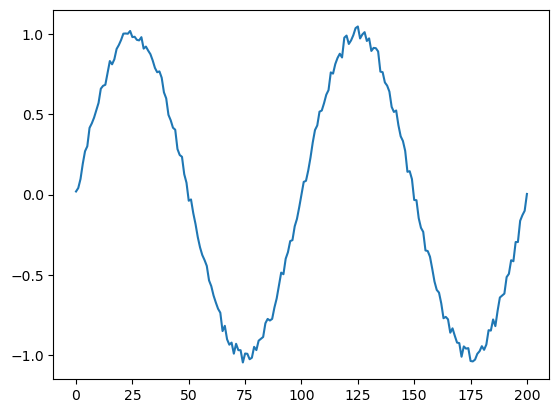

In [3]:
#3.データの確認
plt.plot(range(length_of_sequences), f)
plt.show()

In [4]:
#4. 教師データと評価データを作成
maxlen = 25

x = []
t = []

for i in range(length_of_sequences - maxlen):
    x.append(f[i:i+maxlen])
    t.append(f[i+maxlen])

x = np.array(x).reshape(-1, maxlen, 1)
t = np.array(t).reshape(-1, 1)

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.2, shuffle=True)

In [5]:
#5. モデルの構築
model = Sequential()
model.add(SimpleRNN(50, activation='tanh',
                    kernel_initializer='glorot_normal',
                    recurrent_initializer='orthogonal'))
model.add(Dense(1, activation='linear'))
optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,
                  loss='mean_squared_error')

In [6]:
#6.学習
es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       mode="auto")
hist = model.fit(x_train, t_train,
                 epochs=300, batch_size=100,
                 verbose=2,
                 validation_data=(x_val, t_val),
                 callbacks=[es]
                )

Epoch 1/300
2/2 - 1s - loss: 0.3066 - val_loss: 0.1222 - 891ms/epoch - 446ms/step
Epoch 2/300
2/2 - 0s - loss: 0.1401 - val_loss: 0.0769 - 39ms/epoch - 20ms/step
Epoch 3/300
2/2 - 0s - loss: 0.0730 - val_loss: 0.0457 - 32ms/epoch - 16ms/step
Epoch 4/300
2/2 - 0s - loss: 0.0325 - val_loss: 0.0245 - 31ms/epoch - 16ms/step
Epoch 5/300
2/2 - 0s - loss: 0.0219 - val_loss: 0.0250 - 17ms/epoch - 8ms/step
Epoch 6/300
2/2 - 0s - loss: 0.0309 - val_loss: 0.0241 - 19ms/epoch - 10ms/step
Epoch 7/300
2/2 - 0s - loss: 0.0283 - val_loss: 0.0163 - 33ms/epoch - 17ms/step
Epoch 8/300
2/2 - 0s - loss: 0.0182 - val_loss: 0.0131 - 19ms/epoch - 9ms/step
Epoch 9/300
2/2 - 0s - loss: 0.0103 - val_loss: 0.0138 - 43ms/epoch - 22ms/step
Epoch 10/300
2/2 - 0s - loss: 0.0085 - val_loss: 0.0159 - 32ms/epoch - 16ms/step
Epoch 11/300
2/2 - 0s - loss: 0.0102 - val_loss: 0.0149 - 32ms/epoch - 16ms/step
Epoch 12/300
2/2 - 0s - loss: 0.0099 - val_loss: 0.0105 - 34ms/epoch - 17ms/step
Epoch 13/300
2/2 - 0s - loss: 0.0068 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


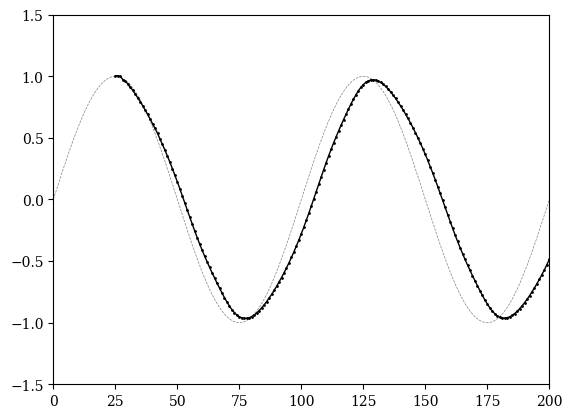

In [7]:
#7.モデルの評価
sin = toy_problem(T, ampl=0.)
gen = [None for i in range(maxlen)]

z = x[:1]

# 逐次的に予測値を求める
for i in range(length_of_sequences - maxlen):
    preds = model.predict(z[-1:])
    z = np.append(z, preds)[1:]
    z = z.reshape(-1, maxlen, 1)
    gen.append(preds[0, 0])

# 予測値を可視化
plt.rc('font', family='serif')
plt.xlim([0, 2*T])
plt.ylim([-1.5, 1.5])
plt.plot(range(len(f)), sin,
         color='gray',
         linestyle='--', linewidth=0.5)
plt.plot(range(len(f)), gen,
         color='black', linewidth=1,
         marker='o', markersize=1, markerfacecolor='black',
         markeredgecolor='black')
plt.show()